In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
from os import listdir
from os.path import isfile, join

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/train.csv").astype('float32')
print(data.head(10))

       0      1      2      3      4      5  ...  779  780  781  782  783   784
0    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
1    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
2    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
3  255.0  255.0  255.0  255.0  255.0  255.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
4    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
5    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
6    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
7  255.0  255.0  255.0  255.0  255.0  255.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
8  255.0  255.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0
9    0.0    0.0    0.0    0.0    0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  10.0

[10 rows x 785 columns]


In [ ]:
y = data['784']
X = data.drop('784',axis = 1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (154451, 28, 28)
Test data shape:  (38613, 28, 28)


In [ ]:
dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'-',11:'+',12:'=',13:'x'}

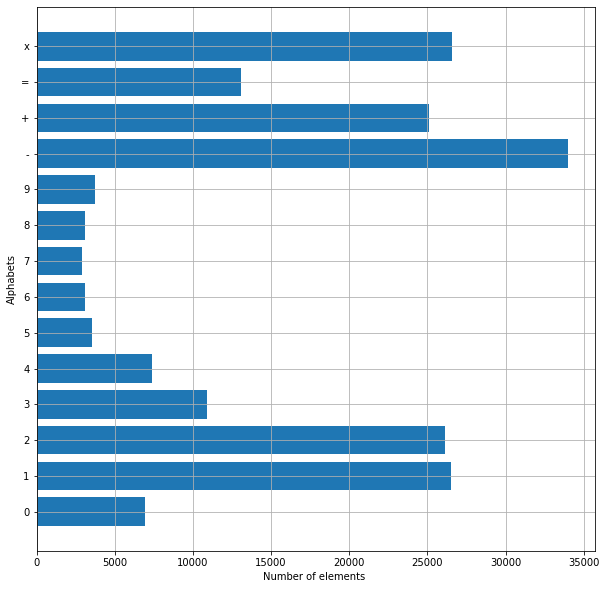

In [ ]:
y_int = np.int0(y)
count = np.zeros(14, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

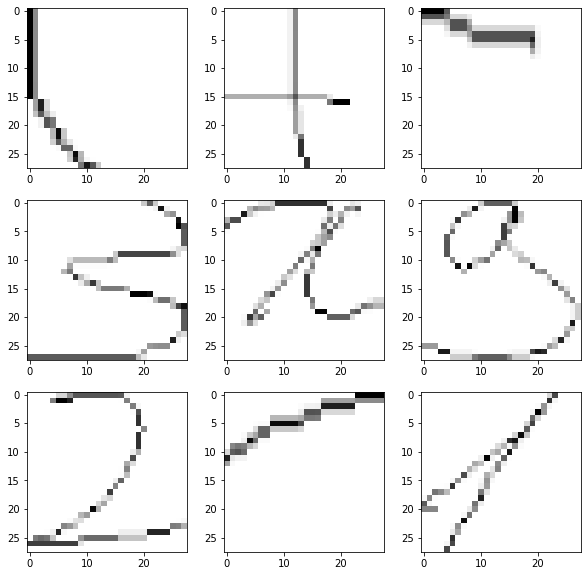

In [ ]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (154451, 28, 28, 1)
New shape of train data:  (38613, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 14, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 14, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (154451, 14)
New shape of test labels:  (38613, 14)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))

model.add(Dense(128,activation ="relu"))

model.add(Dense(14,activation ="softmax"))


optimizer = tf.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

optimizer = tf.optimizers.Adadelta()

optimizer = tf.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','mse','mae','mape'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
4827/4827 [==============================] - 179s 37ms/step - loss: 0.2729 - accuracy: 0.9048 - mse: 0.0099 - mae: 0.0195 - mape: 9772731.0000 - val_loss: 0.1449 - val_accuracy: 0.9463 - val_mse: 0.0058 - val_mae: 0.0108 - val_mape: 5389821.0000
Epoch 2/10
4827/4827 [==============================] - 178s 37ms/step - loss: 0.1246 - accuracy: 0.9532 - mse: 0.0050 - mae: 0.0100 - mape: 5010359.0000 - val_loss: 0.1296 - val_accuracy: 0.9540 - val_mse: 0.0051 - val_mae: 0.0086 - val_mape: 4284064.0000
Epoch 3/10
4827/4827 [==============================] - 179s 37ms/step - loss: 0.0991 - accuracy: 0.9624 - mse: 0.0041 - mae: 0.0081 - mape: 4059240.5000 - val_loss: 0.1046 - val_accuracy: 0.9572 - val_mse: 0.0044 - val_mae: 0.0092 - val_mape: 4601925.0000
Epoch 4/10
4827/4827 [==============================] - 179s 37ms/step - loss: 0.0821 - accuracy: 0.9685 - mse: 0.0034 - mae: 0.0068 - mape: 3386391.7500 - val_loss: 0.0910 - val_accuracy: 0.9658 - val_mse: 0.0037 - val_mae: 0.00

In [ ]:
model.save(r'/content/model_hand.h5')

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("/content/model_final.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/model_final.h5")

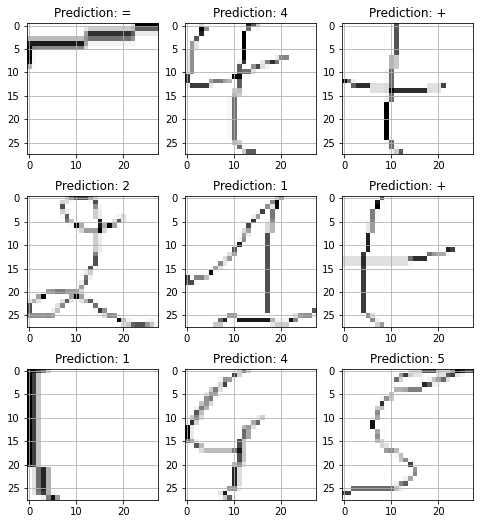

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
final = []
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = dict[np.argmax(test_yOHE[i])]
    final.append(pred)
    
    ax.set_title("Prediction: "+pred)
    ax.grid()


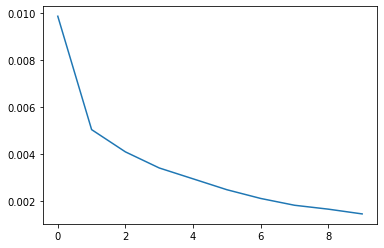

In [ ]:
plt.plot(history.history['mse'])
plt.show()

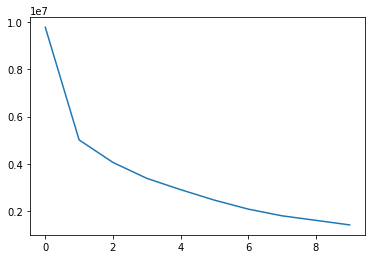

In [ ]:
plt.plot(history.history['mape'])
plt.show()

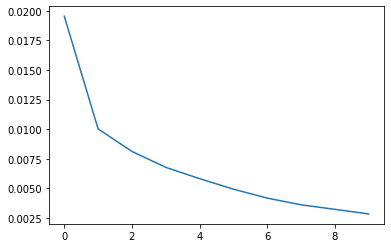

In [ ]:
plt.plot(history.history['mae'])
plt.show()